<a href="https://colab.research.google.com/github/jcmachicao/curso_ai_salud/blob/master/modpred__evaluar_resultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización del Modelamiento

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset = datasets.load_breast_cancer()
# Recordar que el dataset tiene data y target (X, y)

In [3]:
dataset.data.shape, dataset.target.shape

((569, 30), (569,))

In [49]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [73]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [66]:
X_o = dataset.data
X_o.shape

(569, 30)

In [67]:
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
sca.fit(X_o)
X_on = sca.transform(X_o)
X_on.shape

(569, 30)

In [77]:
data_df = pd.DataFrame(X_on)
data_df.columns = dataset.feature_names
data_df['label'] = dataset.target
data_df.label = data_df.label.replace({0: 'maligno', 1: 'benigno'})
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,maligno
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,maligno
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,maligno
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,maligno
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,maligno


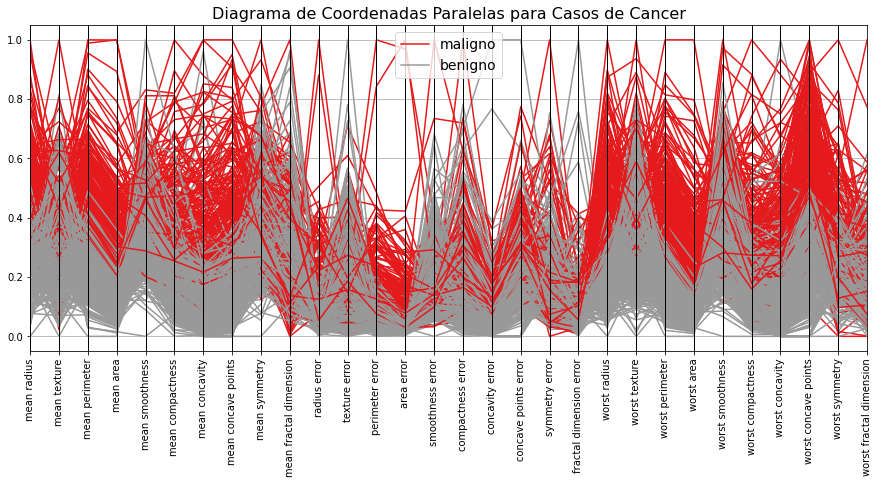

In [81]:
plt.figure(figsize=(15, 6))
pd.plotting.parallel_coordinates(data_df, class_column='label', colormap='Set1')
#plt.xlim(-0.8, 0.8)
#plt.ylim(-0.8, 0.8)
plt.title('Diagrama de Coordenadas Paralelas para Casos de Cancer', fontsize=16)
plt.xticks(rotation=90)
plt.legend(fontsize=14)
plt.show()

In [82]:
from sklearn.decomposition import PCA

In [85]:
# Conversión
pca = PCA(n_components=2)
pca.fit(X_on)
X = pca.transform(X_on)
X.shape

(569, 2)

In [86]:
y = dataset.target
y.shape

(569,)

In [87]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
x_min, x_max, y_min, y_max

(-1.4219136477598444,
 2.6879567808174474,
 -1.427135942049505,
 2.025088668290068)

In [89]:
#MESH
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA'])
h = 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [91]:
knn = KNeighborsClassifier()
knn.fit(X, y)
Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

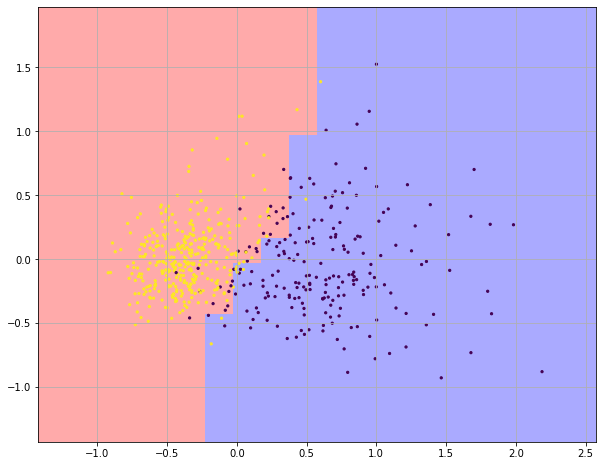

In [93]:
plt.figure(figsize=(10, 8), facecolor='white')
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
#Plot the training points
plt.scatter(X[:,0], X[:,1], s=5, c=y)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(), yy.max())
plt.grid(True)
plt.show()

In [94]:
rfc = RandomForestClassifier()
rfc.fit(X, y)
Z = rfc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

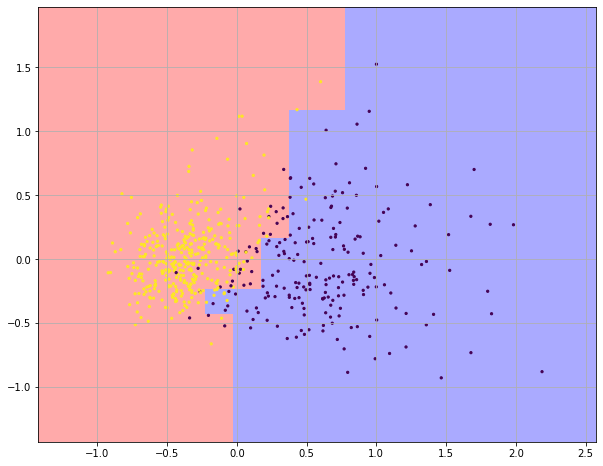

In [96]:
plt.figure(figsize=(10,8), facecolor='white')
plt.pcolormesh(xx, yy, Z,cmap=cmap_light)
#Plot the training points
plt.scatter(X[:,0], X[:,1], c=y, s=5)
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.grid(True)
plt.show()

In [97]:
from sklearn.model_selection import learning_curve

In [98]:
tr_sz, tr_sc, ts_sc = learning_curve(knn, X, y)

In [99]:
tr_sz

array([ 45, 147, 250, 352, 455])

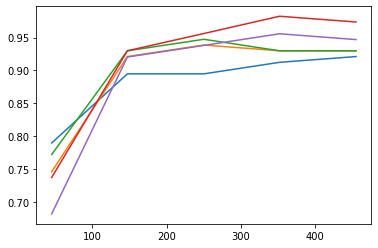

In [101]:
plt.plot(tr_sz, ts_sc)